<a href="https://colab.research.google.com/github/alforerov/BigData-UD/blob/main/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

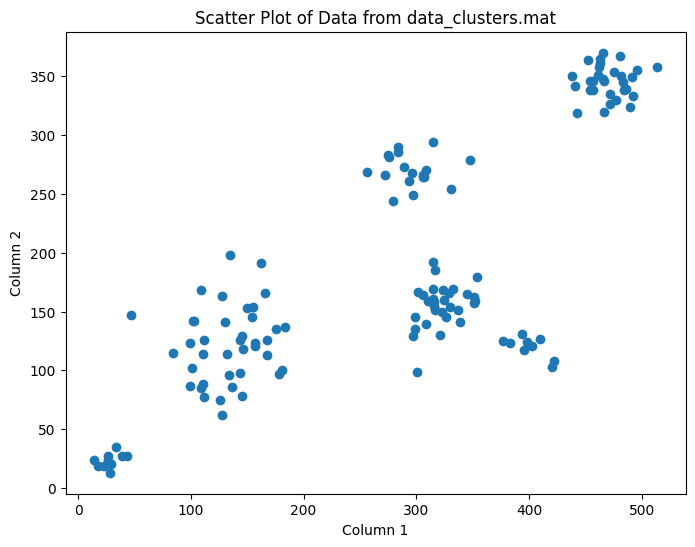

In [ ]:
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

mat_data = sio.loadmat('data_clusters.mat')
data_array = mat_data['X']
df = pd.DataFrame(data_array)
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.title("Scatter Plot of Data from data_clusters.mat")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Reasoning**:
Iterate through a range of cluster numbers, fit the KMeans model, and store the inertia values.



In [ ]:
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

**Reasoning**:
Plot the inertia values against the number of clusters as instructed.



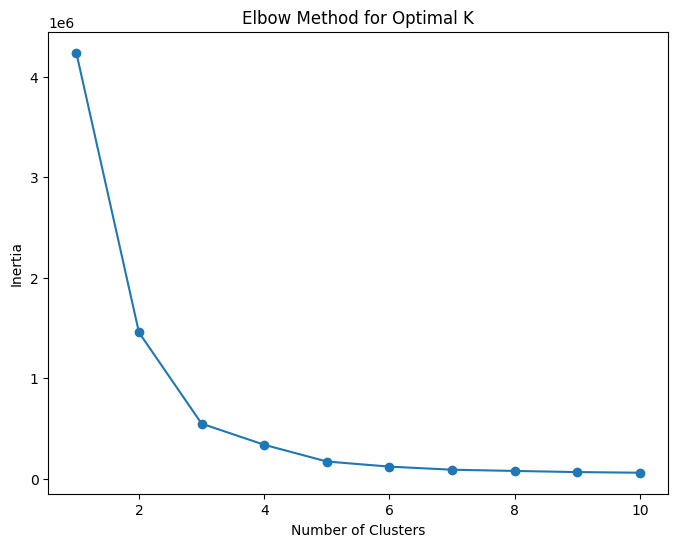

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

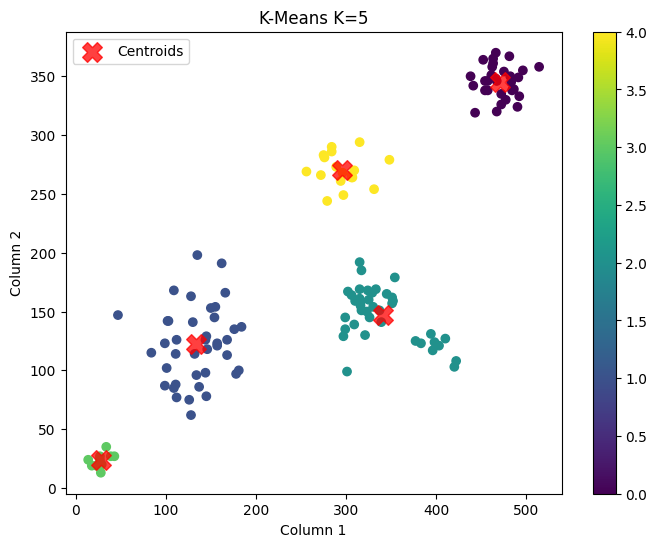

Promedio de Silhouette


El coeficiente de Silhouette es: 0.7029524097489163


In [ ]:
# Convert column names to strings
df.columns = df.columns.astype(str)

kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(df)
df['cluster_label'] = kmeans.labels_


plt.figure(figsize=(8, 6))
scatter = plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster_label'])
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.title("K-Means K=5")
plt.colorbar(scatter)
# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.legend()

plt.show()

print("Promedio de Silhouette")
print("")
print("")
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df.iloc[:, :2], df['cluster_label'])
print(f"El coeficiente de Silhouette es: {silhouette_avg}")

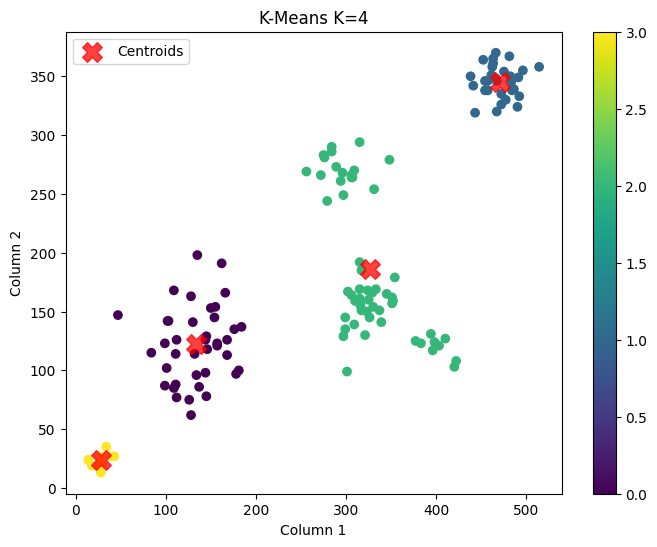

Promedio de Silhouette


El coeficiente de Silhouette es: 0.665819820318984


In [ ]:
# Convert column names to strings
df.columns = df.columns.astype(str)

kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(df)
df['cluster_label'] = kmeans.labels_


plt.figure(figsize=(8, 6))
scatter = plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster_label'])
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.title("K-Means K=4")
plt.colorbar(scatter)
# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.legend()

plt.show()

print("Promedio de Silhouette")
print("")
print("")
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df.iloc[:, :2], df['cluster_label'])
print(f"El coeficiente de Silhouette es: {silhouette_avg}")

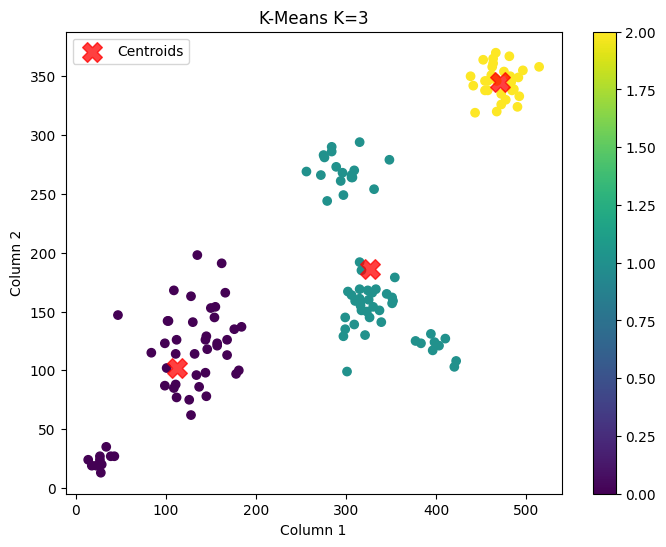

Promedio de Silhouette


El coeficiente de Silhouette es: 0.6682928448171516


In [ ]:
# Convert column names to strings
df.columns = df.columns.astype(str)

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(df)
df['cluster_label'] = kmeans.labels_

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster_label'])
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.title("K-Means K=3")
plt.colorbar(scatter)
# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.legend()

plt.show()

print("Promedio de Silhouette")
print("")
print("")
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df.iloc[:, :2], df['cluster_label'])
print(f"El coeficiente de Silhouette es: {silhouette_avg}")

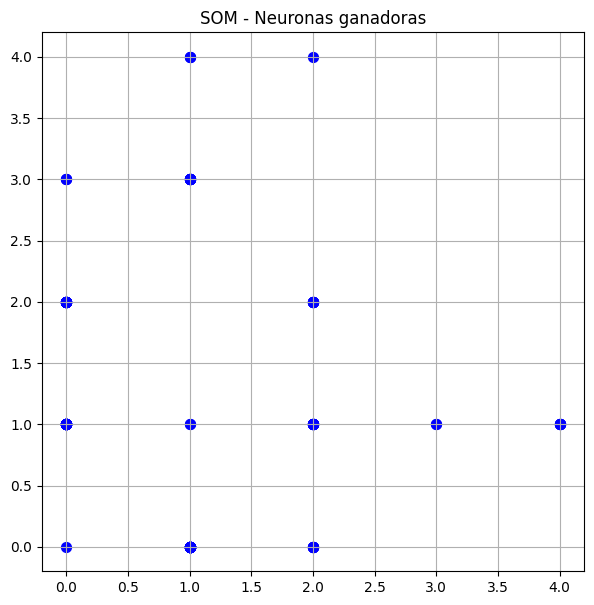

In [ ]:
!pip install minisom
from minisom import MiniSom
import numpy as np

# Definir tamaño del SOM (rejilla 5x5 = 25 neuronas)
som_x, som_y = 5, 5
som = MiniSom(som_x, som_y, mat_data['X'].shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.train(mat_data['X'], 100)

# Visualización de los ganadores (neurona BMU)
plt.figure(figsize=(7, 7))
winners = np.array([som.winner(x) for x in mat_data['X']])
plt.scatter(winners[:, 0], winners[:, 1], s=50, c='blue')
plt.title("SOM - Neuronas ganadoras")
plt.grid(True)
plt.show()

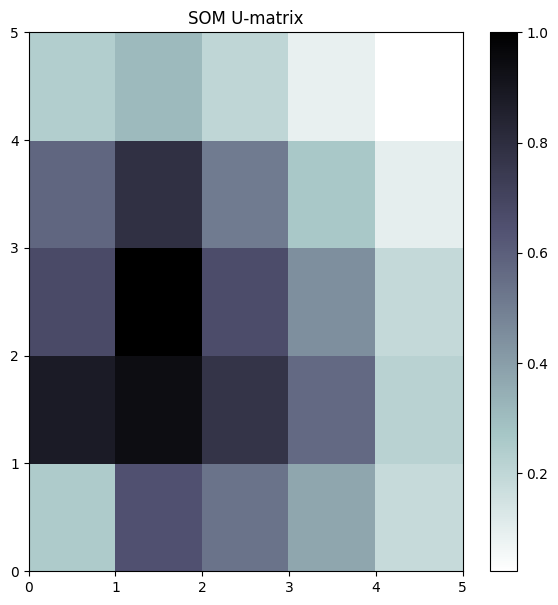

In [ ]:
from matplotlib.colors import ListedColormap

# Calculate the U-matrix
umatrix = som.distance_map()

# Plot the U-matrix
plt.figure(figsize=(7, 7))
plt.pcolor(umatrix.T, cmap='bone_r')  # Transpose the U-matrix for correct orientation
plt.colorbar()
plt.title('SOM U-matrix')
plt.show()

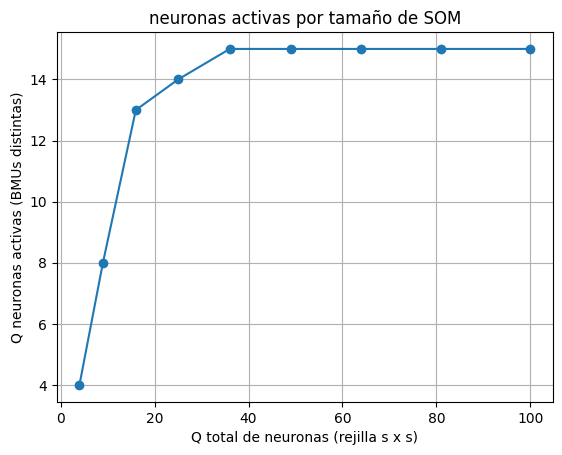

In [ ]:
def entrenar_som_grid(xy):
    som = MiniSom(xy, xy, mat_data['X'].shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
    som.train(mat_data['X'], 100)
    bmus = [som.winner(x) for x in mat_data['X']]
    return len(set(bmus))

# Evaluar número de neuronas activas para distintas dimensiones
neurona_activa = []
sizes = list(range(2, 11))

for s in sizes:
    n_bmus = entrenar_som_grid(s)
    neurona_activa.append(n_bmus)

plt.plot([s*s for s in sizes], neurona_activa, marker='o')
plt.xlabel("Q total de neuronas (rejilla s x s)")
plt.ylabel("Q neuronas activas (BMUs distintas)")
plt.title("neuronas activas por tamaño de SOM")
plt.grid(True)
plt.show()

# **PUNTO 2**
Use los datos tomados del repositorio de la UCI (https://archive.ics.uci.edu/ml/datasets/Avila), la cual es una base de datos de un problema multiclase para la clasificación del copista de
fragmentos de un códice del siglo XII, como lo es la biblia de Ávila. Para hacer el análisis más simple puede eliminar o unir las cuatro (4) clases con menor cantidad de datos.
Cada grupo debe realizar un análisis de la efectividad del agrupamiento; de acuerdo a los procedimientos de aprendizaje no supervisado (Coeficiente de Silhouette y gráfica de Elbow).


**Reasoning**:
Load the data from the "avila.xlsx" file into a pandas DataFrame and display the first few rows and information.



In [ ]:
df_avila = pd.read_excel('avila.xlsx')
display(df_avila.head())
display(df_avila.info())

,0.266074,-0.16562,0.32098,0.483299,0.17234,0.273364,0.371178,0.929823,0.251173,0.159345,A
0,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,B
1,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,C
2,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,D
3,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,E
4,0.117948,-0.220579,-3.210528,-1.623238,0.261718,-0.349509,0.257927,-0.385979,-0.247731,-0.331310,F


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20866 entries, 0 to 20865
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0.266074  20866 non-null  float64
 1   -0.16562  20866 non-null  float64
 2   0.32098   20866 non-null  float64
 3   0.483299  20866 non-null  float64
 4   0.17234   20866 non-null  float64
 5   0.273364  20866 non-null  float64
 6   0.371178  20866 non-null  float64
 7   0.929823  20866 non-null  float64
 8   0.251173  20866 non-null  float64
 9   0.159345  20866 non-null  float64
 10  A         20866 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.8+ MB


None

In [ ]:
# 1. Check for missing values
print("Missing values before handling:")
print(df_avila.isnull().sum())

# 2. Analyze the distribution of the target variable
# Assuming the last column is the target and is of object type
target_column = df_avila.columns[-1]
print("\nClass distribution before dropping:")
print(df_avila[target_column].value_counts())

# Identify the four classes with the fewest data points
class_counts = df_avila[target_column].value_counts()
classes_to_drop = class_counts.tail(4).index.tolist()
print(f"\nClasses to drop: {classes_to_drop}")

# 3. Drop the rows belonging to these four classes
df_avila_filtered = df_avila[~df_avila[target_column].isin(classes_to_drop)].copy()
print("\nClass distribution after dropping:")
print(df_avila_filtered[target_column].value_counts())

# 4. Separate the features from the target variable
X = df_avila_filtered.drop(columns=[target_column])
y = df_avila_filtered[target_column]

# 5. Apply a standard scaler to the feature columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Store the preprocessed features in a new DataFrame
# Overwriting the existing feature DataFrame X is fine, or create a new one.
# Creating a new one to keep the original scaled data as a numpy array
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled_df.head())

Missing values before handling:
 0.266074    0
-0.16562     0
 0.32098     0
 0.483299    0
 0.17234     0
 0.273364    0
 0.371178    0
 0.929823    0
 0.251173    0
 0.159345    0
 A           0
dtype: int64

Class distribution before dropping:
A
B    2087
C    2087
D    2087
E    2087
F    2087
G    2087
H    2086
I    2086
J    2086
A    2086
Name: count, dtype: int64

Classes to drop: ['H', 'I', 'J', 'A']

Class distribution after dropping:
A
B    2087
C    2087
D    2087
E    2087
F    2087
G    2087
Name: count, dtype: int64


,0.266074,-0.16562,0.32098,0.483299,0.17234,0.273364,0.371178,0.929823,0.251173,0.159345
0,0.126930,0.857849,-3.281944,0.067008,0.255153,1.440213,1.448226,0.630551,0.278464,0.521718
1,-0.120359,0.068710,0.072440,-0.771196,0.255153,0.442065,-0.082373,-0.882308,-0.123004,0.588924
2,0.028014,0.293074,-3.281944,-0.573394,-0.742782,-0.306545,0.701592,1.042885,0.587285,-0.525597
3,0.225846,0.795956,-0.051258,0.086972,0.255153,0.150940,0.626929,0.049855,0.031406,-0.079221
4,0.114565,-0.217546,-3.281944,-1.603900,0.255153,-0.348135,0.253612,-0.383866,-0.246533,-0.323350


## K-means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_values = []
silhouette_scores = []

# Iterate through a range of cluster numbers from 2 to 11 (10 variations)
for k in range(2, 12):
    # Create a KMeans model instance
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the KMeans model to the scaled data
    kmeans.fit(X_scaled_df)

    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)

    # Calculate the silhouette score and append to the list
    score = silhouette_score(X_scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

print("Inertia values:", inertia_values)
print("Silhouette scores:", silhouette_scores)

Inertia values: [109125.77340289843, 95322.16487724241, 86020.94201954344, 78463.19273845162, 71896.73024193973, 66525.12846976682, 61875.48299780246, 57676.2614671552, 54701.02694898445, 52644.53299475421]
Silhouette scores: [np.float64(0.46505091093727735), np.float64(0.18866445734770293), np.float64(0.18228487073062585), np.float64(0.1964637493318241), np.float64(0.20305116664762932), np.float64(0.17788921835326227), np.float64(0.18459735381730286), np.float64(0.19011480914313192), np.float64(0.19055571486333997), np.float64(0.1589647919535197)]


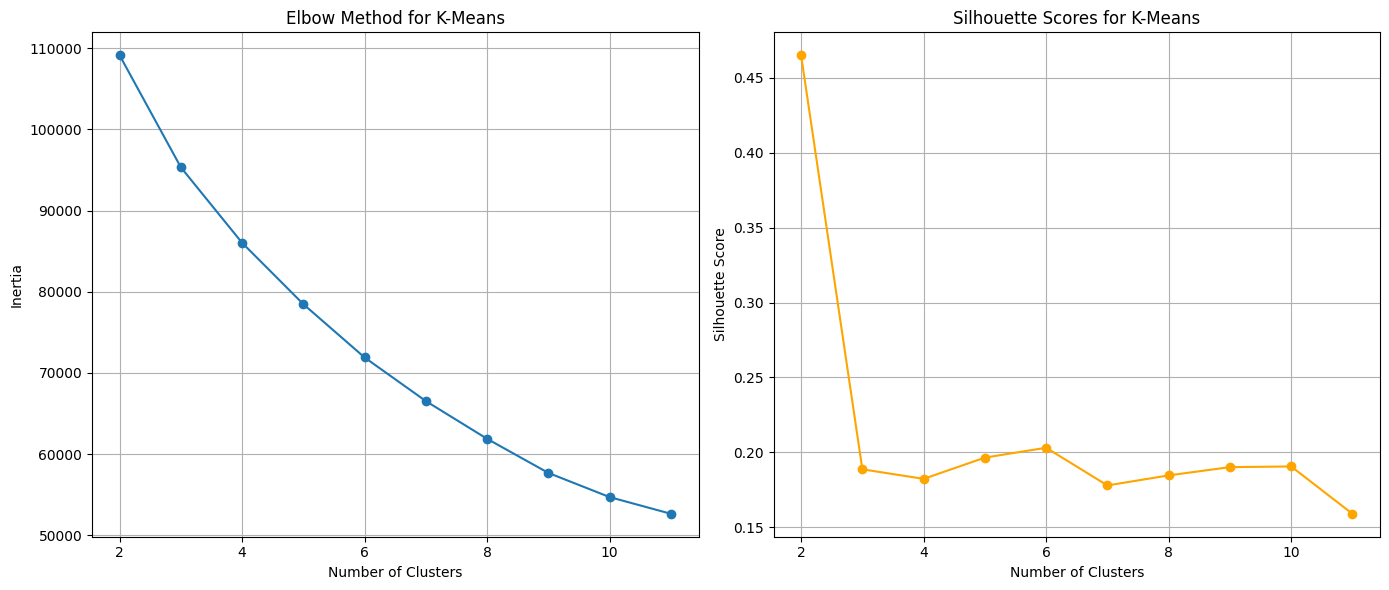

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Elbow method
axes[0].plot(range(2, 12), inertia_values, marker='o')
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Inertia")
axes[0].set_title("Elbow Method for K-Means")
axes[0].grid(True)

# Plot the Silhouette scores
axes[1].plot(range(2, 12), silhouette_scores, marker='o', color='orange')
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Silhouette Score")
axes[1].set_title("Silhouette Scores for K-Means")
axes[1].grid(True)

# Ensure plots are properly displayed
plt.tight_layout()
plt.show()

In [ ]:
!pip install minisom

**Reasoning**:
Create empty lists to store evaluation metrics and define the range of grid sizes.



In [ ]:
import numpy as np
from minisom import MiniSom
from sklearn.metrics import silhouette_score

quantization_errors = []
topographic_errors = []
silhouette_scores_som = []
sizes = range(2, 12) # Range from 2x2 to 11x11 grids (10 variations)

In [ ]:
# Iterate through each grid size
quantization_errors = []
topographic_errors = []
silhouette_scores_som = []
for s in sizes:
    som_x, som_y = s, s
    # Initialize MiniSom model
    som = MiniSom(som_x, som_y, X_scaled_df.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)

    # Train the SOM
    som.train(X_scaled_df.values, 100)
    quantization_errors.append(som.quantization_error(X_scaled_df.values))
    topographic_errors.append(som.topographic_error(X_scaled_df.values))


    winners = np.array([som.winner(x) for x in X_scaled_df.values])
    labels = np.ravel_multi_index(winners.T, (som_x, som_y))

    if len(np.unique(labels)) > 1:
        silhouette_avg = silhouette_score(X_scaled_df, labels)
        silhouette_scores_som.append(silhouette_avg)
    else:
        silhouette_scores_som.append(np.nan)

print("Quantization Errors:", quantization_errors)
print("Topographic Errors:", topographic_errors)
print("Silhouette Scores (SOM):", silhouette_scores_som)

Quantization Errors: [np.float64(2.2520360275306794), np.float64(2.004432688082839), np.float64(1.8726803933922864), np.float64(1.7659527804926607), np.float64(1.72180209395916), np.float64(1.7001887858109896), np.float64(1.672417319443243), np.float64(1.6483504946840266), np.float64(1.6699044535139416), np.float64(1.6700397862703689)]
Topographic Errors: [np.float64(0.0), np.float64(0.09064047276792844), np.float64(0.18559335569397858), np.float64(0.39418623223127297), np.float64(0.45200447212905287), np.float64(0.38380450407283184), np.float64(0.44170260341798434), np.float64(0.43938667944417825), np.float64(0.5511899057658521), np.float64(0.5619709311611564)]
Silhouette Scores (SOM): [np.float64(0.16840247453205337), np.float64(0.07820627989522719), np.float64(0.07425435027580339), np.float64(-0.0033869736550576905), np.float64(-0.011892259126944811), np.float64(-0.029779009203576446), np.float64(-0.05531222419726041), np.float64(-0.05467622971538221), np.float64(-0.0836257403869516

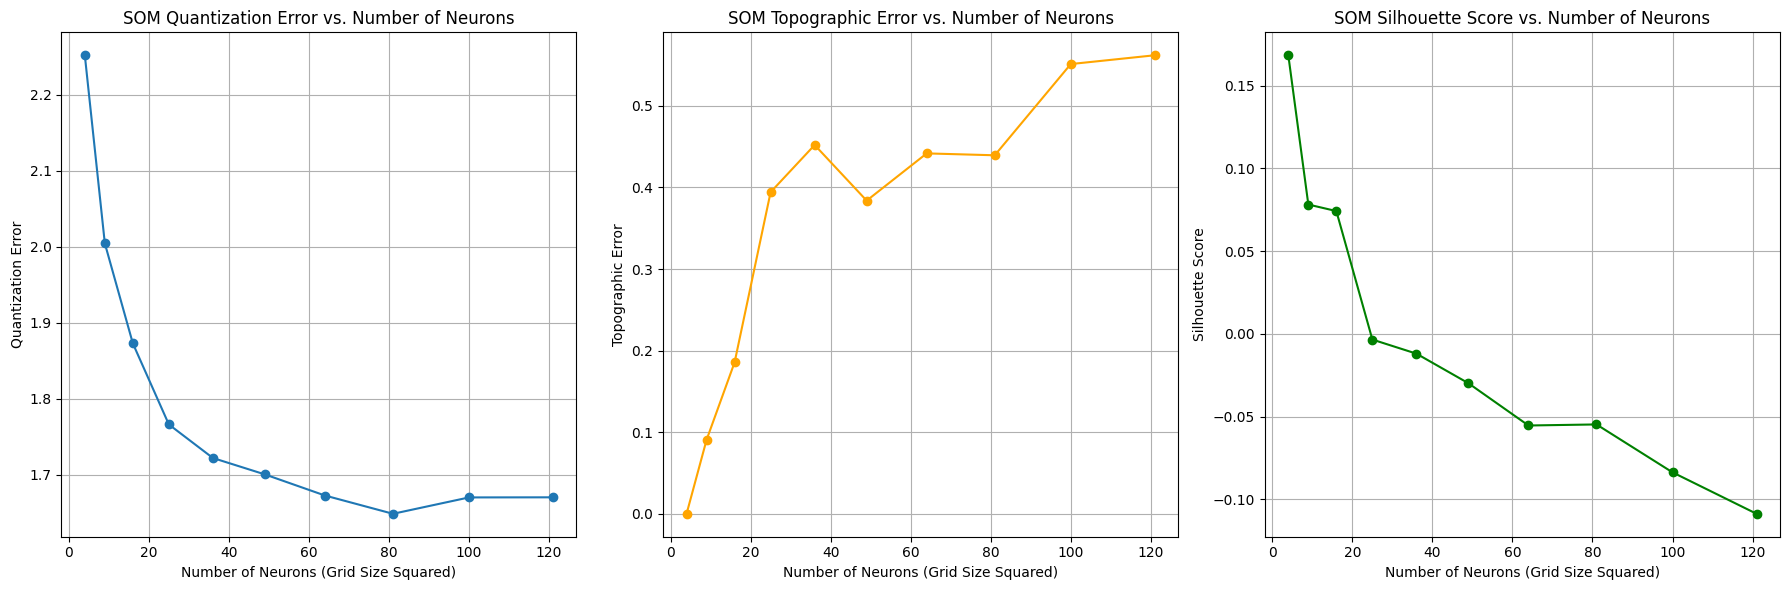

In [ ]:
# Calculate the number of neurons for each grid size
num_neurons = [s * s for s in sizes]

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot quantization errors
axes[0].plot(num_neurons, quantization_errors, marker='o')
axes[0].set_xlabel("Number of Neurons (Grid Size Squared)")
axes[0].set_ylabel("Quantization Error")
axes[0].set_title("SOM Quantization Error vs. Number of Neurons")
axes[0].grid(True)

# Plot topographic errors
axes[1].plot(num_neurons, topographic_errors, marker='o', color='orange')
axes[1].set_xlabel("Number of Neurons (Grid Size Squared)")
axes[1].set_ylabel("Topographic Error")
axes[1].set_title("SOM Topographic Error vs. Number of Neurons")
axes[1].grid(True)

# Plot Silhouette scores
axes[2].plot(num_neurons, silhouette_scores_som, marker='o', color='green')
axes[2].set_xlabel("Number of Neurons (Grid Size Squared)")
axes[2].set_ylabel("Silhouette Score")
axes[2].set_title("SOM Silhouette Score vs. Number of Neurons")
axes[2].grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [ ]:
print("Comparison of K-Means and SOM Evaluation Results:")
print("\nK-Means Evaluation:")
print(f"- Elbow Method (Inertia): {inertia_values}")
print(f"- Silhouette Scores: {silhouette_scores}")

print("\nSOM Evaluation:")
print(f"- Quantization Errors: {quantization_errors}")
print(f"- Topographic Errors: {topographic_errors}")
print(f"- Silhouette Scores: {silhouette_scores_som}")


Comparison of K-Means and SOM Evaluation Results:

K-Means Evaluation:
- Elbow Method (Inertia): [109125.77340289843, 95322.16487724241, 86020.94201954344, 78463.19273845162, 71896.73024193973, 66525.12846976682, 61875.48299780246, 57676.2614671552, 54701.02694898445, 52644.53299475421]
- Silhouette Scores: [np.float64(0.46505091093727735), np.float64(0.18866445734770293), np.float64(0.18228487073062585), np.float64(0.1964637493318241), np.float64(0.20305116664762932), np.float64(0.17788921835326227), np.float64(0.18459735381730286), np.float64(0.19011480914313192), np.float64(0.19055571486333997), np.float64(0.1589647919535197)]

SOM Evaluation:
- Quantization Errors: [np.float64(2.2520360275306794), np.float64(2.004432688082839), np.float64(1.8726803933922864), np.float64(1.7659527804926607), np.float64(1.72180209395916), np.float64(1.7001887858109896), np.float64(1.672417319443243), np.float64(1.6483504946840266), np.float64(1.6699044535139416), np.float64(1.6700397862703689)]
- Top

In [ ]:
#Segun el ejercicio anterior, el nuero optimo de clusters esta entre 3 y 5, eligiremos 4
optimal_kmeans_k = 4

# 25 neuronas (5x5)
optimal_som_grid_size = 5


X_scaled_df.columns = X_scaled_df.columns.astype(str)


kmeans = KMeans(n_clusters=optimal_kmeans_k, random_state=42, n_init=10)
kmeans.fit(X_scaled_df)
X_scaled_df['kmeans_labels'] = kmeans.labels_

som_x, som_y = optimal_som_grid_size, optimal_som_grid_size
som = MiniSom(som_x, som_y, X_scaled_df.drop(columns=['kmeans_labels']).shape[1], sigma=1.0, learning_rate=0.5, random_seed=42) # Exclude kmeans_labels column
som.train(X_scaled_df.drop(columns=['kmeans_labels']).values, 100)


winners = np.array([som.winner(x) for x in X_scaled_df.drop(columns=['kmeans_labels']).values])

X_scaled_df['som_labels'] = np.ravel_multi_index(winners.T, (som_x, som_y))

display(X_scaled_df.head())

,0.266074,-0.16562,0.32098,0.483299,0.17234,0.273364,0.371178,0.929823,0.251173,0.159345,kmeans_labels,som_labels
0,0.126930,0.857849,-3.281944,0.067008,0.255153,1.440213,1.448226,0.630551,0.278464,0.521718,1,22
1,-0.120359,0.068710,0.072440,-0.771196,0.255153,0.442065,-0.082373,-0.882308,-0.123004,0.588924,2,14
2,0.028014,0.293074,-3.281944,-0.573394,-0.742782,-0.306545,0.701592,1.042885,0.587285,-0.525597,1,22
3,0.225846,0.795956,-0.051258,0.086972,0.255153,0.150940,0.626929,0.049855,0.031406,-0.079221,3,16
4,0.114565,-0.217546,-3.281944,-1.603900,0.255153,-0.348135,0.253612,-0.383866,-0.246533,-0.323350,1,22


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target for K-Means based data
X_kmeans = X_scaled_df.drop(columns=['kmeans_labels', 'som_labels']) # Exclude both label columns
y_kmeans = X_scaled_df['kmeans_labels']

# Split K-Means data
X_train_kmeans, X_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(
    X_kmeans, y_kmeans, test_size=0.2, random_state=42
)

# Define features and target for SOM based data
X_som = X_scaled_df.drop(columns=['kmeans_labels', 'som_labels']) # Use the same features as K-Means
y_som = X_scaled_df['som_labels']

# Split SOM data
X_train_som, X_test_som, y_train_som, y_test_som = train_test_split(
    X_som, y_som, test_size=0.2, random_state=42
)

print("K-Means Data Split Shapes:")
print("X_train_kmeans:", X_train_kmeans.shape)
print("X_test_kmeans:", X_test_kmeans.shape)
print("y_train_kmeans:", y_train_kmeans.shape)
print("y_test_kmeans:", y_test_kmeans.shape)

print("\nSOM Data Split Shapes:")
print("X_train_som:", X_train_som.shape)
print("X_test_som:", X_test_som.shape)
print("y_train_som:", y_train_som.shape)
print("y_test_som:", y_test_som.shape)

K-Means Data Split Shapes:
X_train_kmeans: (10017, 10)
X_test_kmeans: (2505, 10)
y_train_kmeans: (10017,)
y_test_kmeans: (2505,)

SOM Data Split Shapes:
X_train_som: (10017, 10)
X_test_som: (2505, 10)
y_train_som: (10017,)
y_test_som: (2505,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Choose Logistic Regression as a suitable classification model
# Instantiate the classifier for K-Means based data
logreg_kmeans = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier on the K-Means training data
logreg_kmeans.fit(X_train_kmeans, y_train_kmeans)

# Instantiate the classifier for SOM based data
logreg_som = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier on the SOM training data
logreg_som.fit(X_train_som, y_train_som)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores_kmeans = cross_val_score(logreg_kmeans, X_train_kmeans, y_train_kmeans, cv=5)

print(cv_scores_kmeans)
print(cv_scores_kmeans.mean())

cv_scores_som = cross_val_score(logreg_som, X_train_som, y_train_som, cv=5)

print(cv_scores_som)
print(cv_scores_som.mean())

[0.98952096 0.99251497 0.99350974 0.99201198 0.99450824]
0.9924131766422223


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[0.93712575 0.92265469 0.93210185 0.93409885 0.93809286]
0.9328147997564532


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict labels for K-Means based testing data
y_pred_kmeans = logreg_kmeans.predict(X_test_kmeans)

# Calculate and print evaluation metrics for K-Means based model
accuracy_kmeans = accuracy_score(y_test_kmeans, y_pred_kmeans)
precision_kmeans = precision_score(y_test_kmeans, y_pred_kmeans, average='weighted')
recall_kmeans = recall_score(y_test_kmeans, y_pred_kmeans, average='weighted')
f1_kmeans = f1_score(y_test_kmeans, y_pred_kmeans, average='weighted')


print(f"Accuracy: {accuracy_kmeans:.4f}")
print(f"Precision: {precision_kmeans:.4f}")
print(f"Recall: {recall_kmeans:.4f}")
print(f"F1-score: {f1_kmeans:.4f}")


y_pred_som = logreg_som.predict(X_test_som)


accuracy_som = accuracy_score(y_test_som, y_pred_som)
precision_som = precision_score(y_test_som, y_pred_som, average='weighted')
recall_som = recall_score(y_test_som, y_pred_som, average='weighted')
f1_som = f1_score(y_test_som, y_pred_som, average='weighted')

print("\nSOM based Logistic Regression Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy_som:.4f}")
print(f"Precision: {precision_som:.4f}")
print(f"Recall: {recall_som:.4f}")
print(f"F1-score: {f1_som:.4f}")

Accuracy: 0.9900
Precision: 0.9900
Recall: 0.9900
F1-score: 0.9900

SOM based Logistic Regression Model Evaluation on Test Set:
Accuracy: 0.9309
Precision: 0.9301
Recall: 0.9309
F1-score: 0.9292


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
  from sklearn.metrics import confusion_matrix

# Generate and print confusion matrix for K-Means training data
cm_kmeans_train = confusion_matrix(y_train_kmeans, logreg_kmeans.predict(X_train_kmeans))
print("Confusion Matrix for K-Means (Training Data):")
print(cm_kmeans_train)

# Generate and print confusion matrix for K-Means testing data
cm_kmeans_test = confusion_matrix(y_test_kmeans, logreg_kmeans.predict(X_test_kmeans))
print("\nConfusion Matrix for K-Means (Testing Data):")
print(cm_kmeans_test)

# Generate and print confusion matrix for SOM training data
cm_som_train = confusion_matrix(y_train_som, logreg_som.predict(X_train_som))
print("\nConfusion Matrix for SOM (Training Data):")
print(cm_som_train)

# Generate and print confusion matrix for SOM testing data
cm_som_test = confusion_matrix(y_test_som, logreg_som.predict(X_test_som))
print("\nConfusion Matrix for SOM (Testing Data):")
print(cm_som_test)

Confusion Matrix for K-Means (Training Data):
[[ 314    1    3    1]
 [   0 5392    5    3]
 [   3   13 1648    2]
 [   0   12    4 2616]]

Confusion Matrix for K-Means (Testing Data):
[[  82    0    5    0]
 [   0 1331    3    2]
 [   3    5  431    1]
 [   0    4    2  636]]

Confusion Matrix for SOM (Training Data):
[[ 280    1    0    0    0    4   11    0    0    0    4    5    0    1
     0    0    2    0    0    8    0    0    0    0    0]
 [   4   25    0    0    3    0    1    2    0    1    1    0    2    9
     0    0    0    1    0   16    0    0    0    0    0]
 [   0    0  222    4    0    0    0    0    1    0    0    1    0    0
     2    0    0    0    0    0    0    0    0    0    1]
 [   0    0    5  460    0    0    0    2    8    0    0    0    0    1
     0    0    0    0    0    1    0    0    0    0    3]
 [   0    0    0    3  100    0    0    0    5   18    2    0    0    5
     0    0    0    0    0   20    0    0    0    0    1]
 [   1    0    0    0    0  8

In [ ]:
print(cm_som_test)

[[ 86   1   0   0   0   3   8   0   0   0   1   1   0   0   0   0   1   0
    0   1   0   0   0   0]
 [  1   9   1   0   1   0   0   1   0   1   0   0   0   2   0   0   0   0
    0   3   0   0   0   0]
 [  0   0  66   1   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0]
 [  0   0   1  92   0   0   0   0   2   2   0   0   0   0   1   0   0   0
    0   0   0   0   0   1]
 [  0   0   0   1  23   0   0   0   3   1   1   0   0   1   0   0   0   0
    0   4   0   0   0   0]
 [  1   0   0   1   0 187   5   0   0   0   1   1   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 254   1   0   0   0   0   1   2   0   0   0   0
    0   5   0   0   0   0]
 [  1   0   0   0   0   0   0  73   0   0   0   0   0   0   0   0   0   0
    0   7   0   0   0   1]
 [  0   0   0   0   0   0   0   1 197   1   0   0   0   0   0   0   0   0
    0   3   0   0   0   0]
 [  0   0   0   0   1   0   0   0   2 107   2   0   0   1   1   0   0   0
    0   4   0   0

In [95]:
print("\n#### Evaluation Metrics on Test Set:")
print(f"- **K-Means Based Model:** Accuracy: {accuracy_kmeans:.4f}, Precision: {precision_kmeans:.4f}, Recall: {recall_kmeans:.4f}, F1-score: {f1_kmeans:.4f}")
print(f"- **SOM Based Model:** Accuracy: {accuracy_som:.4f}, Precision: {precision_som:.4f}, Recall: {recall_som:.4f}, F1-score: {f1_som:.4f}")

print("\n### Cross-Validation")
print("5-fold cross-validation was performed on the training data for both models to obtain a more robust estimate of their performance and assess generalization error.")

print("\n#### Cross-Validation Results:")
print(f"- **K-Means Based Model:** Mean Cross-Validation Accuracy: {cv_scores_kmeans.mean():.4f}")
print(f"- **SOM Based Model:** Mean Cross-Validation Accuracy: {cv_scores_som.mean():.4f}")

print("\n### Confusion Matrices")
print("Confusion matrices were generated for both the training and testing sets of each model to provide a detailed view of the classification performance and identify specific misclassifications.")

print("\n#### Confusion Matrix for K-Means Based Model (Training Data):")
print(cm_kmeans_train)

print("\n#### Confusion Matrix for K-Means Based Model (Testing Data):")
print(cm_kmeans_test)

print("\n#### Confusion Matrix for SOM Based Model (Training Data):")
print(cm_som_train)

print("\n#### Confusion Matrix for SOM Based Model (Testing Data):")
print(cm_som_test)




#### Evaluation Metrics on Test Set:
- **K-Means Based Model:** Accuracy: 0.9900, Precision: 0.9900, Recall: 0.9900, F1-score: 0.9900
- **SOM Based Model:** Accuracy: 0.9309, Precision: 0.9301, Recall: 0.9309, F1-score: 0.9292

### Cross-Validation
5-fold cross-validation was performed on the training data for both models to obtain a more robust estimate of their performance and assess generalization error.

#### Cross-Validation Results:
- **K-Means Based Model:** Mean Cross-Validation Accuracy: 0.9924
- **SOM Based Model:** Mean Cross-Validation Accuracy: 0.9328

### Confusion Matrices
Confusion matrices were generated for both the training and testing sets of each model to provide a detailed view of the classification performance and identify specific misclassifications.

#### Confusion Matrix for K-Means Based Model (Training Data):
[[ 314    1    3    1]
 [   0 5392    5    3]
 [   3   13 1648    2]
 [   0   12    4 2616]]

#### Confusion Matrix for K-Means Based Model (Testing D